In [132]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

## Perceptrons




In order to gain a deeper understanding of Machine Learning and Neural Networks, we are going to have to start out by learning about Perceptrons.  

Perceptrons are the building blocks of Neural Networks, and while this may sound complicated, their function is well defined by simple Linear Algebra concepts that you are already very familiar with.  As with Neural Networks in general, Perceptrons can be understood through an analogy to biology.  Our brain is composed of Neurons; each Neuron has many dendrites branching out to recieve signals, a cell body that process these inputs, and a single Axon which sends out information to other Neurons.  While a single Neuron cannot accomplish much on its own, combining a whole network of them allows for the incedible functionality that we get from our brain.  An Artificial Neural Network functions in much the same way, with powerful emergent properties coming out of the combination of simple building blocks.  In this analogy, the Perceptron acts as a single Neuron.  And while in later weeks we will examine how Neural Networks are formed by linking these together, this week we will focus on the structure of a single Perceptron and the problems it is able to solve.


### Introduction

A Perceptron is known as a Binary Linear Classifier.  This means it is a good model to use so long as we have a set of linearly seperable data that we want to put into two different categories.  While later in this homework you will look into the different python toolkits that allow us to work with Perceptrons, we will start off by building one by hand.  Perceptrons are relatively simple to construct, and doing so should give you a deeper understanding of how and when to use the prebuilt libraries.

![title](Materials/perceptronModel.png)

Above is a picture of a Perceptron. From here the components should be pretty easy to see.  We have an array of inputs, their corresponding weights, and an activation function (in the above model this activation function is more specifically a step function). 

## (TODO) Weighted Sum

The first step in building a Perceptron is being able to calculate the weighted sum. The summation of weighted inputs should draw your mind to a familiar concept.  Note how this changes when you want process multiple inputs at once. Specifically for a $d$ dimensioned datapoint, the function we are coding is as follows:
$$weightedSum=\sum_{i=1}^d x_i*w_i$$

If you scroll down, we have some empty functions serving as the skeleton code for a Perceptron.  Fill in **Part1** of the weightedSum function.  Assume $x$ and $w$ are both column vectors, but weightedSum will be passed in $x^T$ as its input and $w$ as its weights.  This function should be able to handle multiple inputs at once, where $X$ is passed in as a $R^{nxd}$ dimensioned matrix where $n$ is the number of datapoints and $d$ is their dimension.

## (TODO) Activation Function

Next we will take a look at the activation function.  An activation function is a non-lineaer function that maps a value to a binary output.  There are a lot of different activation functions that can be used, but the one we use for Perceptron is very simple:

$$ f(x) = 
        \begin{cases}
        1, x > 0 \\
        0, x \leq 0
        \end{cases} 
$$
 

For Perceptron, when we pass in our weighted sum to this activation function, we are using information about a point of data to assign it to one of two categories, 0 or 1.  The binary part of Binary Linear Classifier should now make sense. We have started a function called activation below, fill in the code for **Part 2** so that the activation performs as it is defined above.

In [133]:
def weightedSum(inputs, weights):
    """
    Write the code for calculating the Perceptrons weighted sum.
    inputs - nxd dimensional matrix
    weights - dx1 column vector
    
    return - nx1 column vector of weighted sums
    
    """
    result = None
    
    #TODO: PART 1
    #Start 
    result = inputs@weights
    #End
    
    return result

def activation(x):
    """
    Write the code for the Perceptron activation function.
    x - nx1 column vector
    
    return - nx1 column vector of 1's and 0's
    
    """
    result = None

    ##TODO: PART 2
    #Start
    x[x>0] = 1
    x[x<=0] = 0
    result = x
    #End
    
    return result




## Bias

Comparing the weighted sum to the perceptron diagram above, you should notice one main difference.  They have added in a constant term at the start with its own associated weight.  This is what we call the bias.  To analyze why this is needed, lets take a look at the 2D example of a Perceptron.  If we have inputs $x_1$ and $x_2$ and weights $w_1$ and $w_2$, taking the weighted sum combined with our activation function gives us a boundary at:

$$x_1*w_1 + x_2*w_2 = 0$$
$$x_2 = -\frac{w_1}{w_2}*x_1$$

As you can see, this defines a line at the origin with a slope of $-\frac{w_1}{w_2}$.  Anything above this line is classified as a 1 and anything below this line is classified as a 0.  The Linear part of Binary Linear Classifier should now make sense; if we can draw a line (or plane/hyperplane depending on the dimension of our input) that seperates our data, Perceptron should be able to find it.  But in the example above, our line goes through the origin, but what if we want a different y-intercept?  This is where the bias comes in.  When add append a constant to our input and give it a corresponding weight, our 2D example becomes:

$$1*w_0 + x_1*w_1 + x_2*w_2 = 0$$
$$x_2 = -\frac{w_1}{w_2}*x_1 - \frac{w_0}{w_2}$$

As you can see, this defines a new line with the same slope as before, but a y-intercept now at $- \frac{w_0}{w_2}$.  This extends to higher dimensions as well; a constant term should always be augmented to the input data.

## Real Data
With our activation function and weightedSum defined, we can now take a look at how Perceptron works on actual data.  Imagine you are playing a little game with your friend.  They have two types of candy; both look identical but one is incredibly spicy.  They have laid 20 candies out on the table according to a linear pattern, and you are trying to avoid the spicy ones while getting the tasty ones.  You have eaten 10 candies already and carefully recorded their location and whether or not they were spicy.  Every spicy candy you labled with a 1, and every good candy you labeled with a 0.  You think you can use Perceptron to come up with an algorithm that will tell you whether or not the next candy you eat will be safe.  

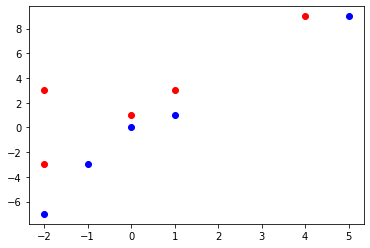

In [134]:
candyLocations = np.array([[1,3], [-2,3], [-2,-3], [0,1], [4,9], [1,1], [0,0],[-1,-3],[-2,-7],[5,9]])
spicyAlert = np.array([[1],[1],[1],[1],[1],[0],[0],[0],[0],[0]])
plt.plot(candyLocations[:5,0], candyLocations[:5,1], 'ro', candyLocations[5:,0], candyLocations[5:,1], 'bo')

Here we have the spicy candy in Red and the good candy in Blue.  As your friend promised, they do seem to be linearly seperable, so Perceptron should be able to give us perfect classification.  We also have a spicyAlert array that tells us which were the bad candies (spicy = 1 and good = 0).

## (TODO) Fitting Data

The final step in getting a Perceptron running is actually being able to fit the data.  Below we have started a fit method for you.  This should return a weight vector that can be used to predict whether a given candy is spicy or not.

**(TODO)**
Before we do anything else, it is important that we initialize our weights.  These should all be set to zero at the start.  Remember that we have to include the Bias as well, so make approppriate changes to the input and number of weights to account for this (what is the restaurants matrix missing).  Implement this initialization in **Part 3** of the fit function.

We have seen that with the appropriate weights, we should be able to define a line that seperates our data into the correct classes.  But how do we settle on those weights? We do this using the Perceptron update formula.  We only want to update our weight whenever there is an incorrect classification; this suggests that (Y_true - Y_pred) should be in the formula, as this will be zero if we predict the label correctly.  Also, we should loop through all the data points when performing this update because we want even a single missclassification to be able to alter the weights. **(TODO)** More specifically, implement the equation below in **Part 4** of the fit function where $y$ is true label and $y^*$ is predicted:

$${w}_{new} = {w}_{old} + r * (y_i - y^*_i) * {x}_i$$



The terms in the above equation should mostly make sense to you, but at this point you should have 2 questions.  What is r? And when do we stop updating?

r is simply our learning rate, it determines how quickly we are updating our weights.  This is what is know as a hyperparameter, and while you don't need to understand what that means right now, just know it is a value that can be changed to improve our performace.  We will not be tuning this hyperparameter at this point in the course, so just set r = .1 and be happy with that.

And as for when to stop updating, this can be done when we have correctly classified all of our data.  We know that our data can be seperated, so we should be fine to let the algorith run to completion.  But in practice we may not know that our data can be seperated, so we want to put some stopping condition into our update equation.  Some common examples of this would be breaking out of the loop after a certain number of itterations or after our error reaches a sufficiently low value.


In [135]:
def fit(inputs,classes):
    """
    Return weights that can be used for correct classification.
    inputs - n x d matrix
    classes - n x 1 column vector
    """
    num_samples = inputs.shape[0]
    dim = inputs.shape[1]
    r = .1
    
    #TODO: PART 3
    #Start
    weights = np.zeros((dim+1,1))
    inputs = np.concatenate([inputs, np.ones((num_samples, 1))], axis=1)
    #End
    
    stop = 100
    for i in range(stop):
        pred = activation(weightedSum(inputs,weights))
        for x in range(num_samples):
            #TOD0: Part 4
            #Start
            modifier = r*(classes[x]-pred[x])*inputs[x,:]
            modifier = modifier.reshape((dim+1,-1))
            weights += modifier
            #End
    pred = activation(weightedSum(inputs,weights))
    print("Training Accuracy: ", np.mean(classes == pred))
    return weights
    

**Running the Code**
<br>
We will now run the test dataset on the code you wrote and plot the results

Training Accuracy:  1.0


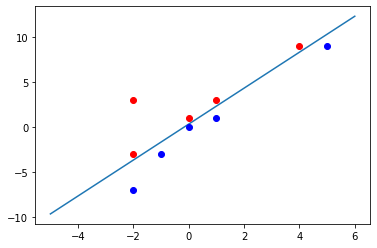

In [137]:
weights = fit(candyLocations, spicyAlert)
x = np.linspace(-5, 6, 1000)
plt.plot(x, -(weights[0]/weights[1])*x - (weights[2]/weights[1]))
plt.plot(candyLocations[:5,0], candyLocations[:5,1], 'ro', candyLocations[5:,0], candyLocations[5:,1], 'bo')

## (TODO) Unseen Data

If you implemented this code correctly, you should get a line that cleanly seperates the candies into their two categories.  This is pretty awesome, but you are not quite done yet.  Our goal is to differentiat the candies you **haven't** seen before. To test this, we must look at the 10 remaining candies on the table that we didn't eat. 

The locations of these candies are listed in the array candyLocation2.  Note that this data has already been augmented with a constant value, so there is no need to perform this step.  

We ask our friend to check the accuracy of our Perceptron, just so that we can know what we are getting outselves into.  She says that she'll write down a reference of which candies are spicy (spicyReference), but that we have to write the function for her. **(TODO)** Fill in the code required to test the accuracy of your Perceptron generated weights in **Part 5** below. Note that these are the weights you calculated in the previous part, **do not generate new weights**.





In [140]:
candyLocations2 = np.array([[1,6,1], [-3,-1,1], [-4,-4,1], [0,7,1], [3,7,1], [5,5,1], [0,-4,1],[1,2,1],[-3,-6,1],[-4,-9,1]])
spicyReference = np.array([[1],[1],[1],[1],[1],[0],[0],[0],[0],[0]])

Accuracy:  1.0


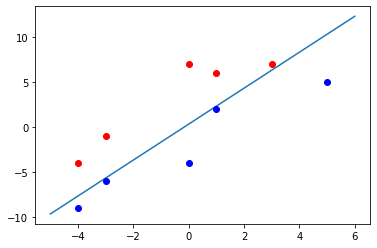

In [141]:
def testAccuracy(weights, inputs, classes):
    accuracy = 0
    #TODO: PART 5
    #Start
    pred = activation(weightedSum(inputs,weights))
    accuracy = np.mean(classes == pred)
    #End
    print("Accuracy: ", accuracy)

testAccuracy(weights, candyLocations2, spicyReference)
plt.plot(x, -(weights[0]/weights[1])*x - (weights[2]/weights[1]))
plt.plot(candyLocations2[:5,0], candyLocations2[:5,1], 'ro', candyLocations2[5:,0], candyLocations2[5:,1], 'bo')

If you see 100% accuracy and a line cleanly seperating the data, then Congradulations! You have implemented a Perceptron and you won't have to eat any spicy candy! You now have the basic understanding of how Neural Networks work. While this was a fairly basic example, the next part of this coding assignment shows some more advanced applications of Perceptron as we get into audio processing. 